In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [3]:
import statsmodels.api as sm

In [4]:
df = pd.read_csv('student-math.csv', delimiter=';')

In [5]:
## ---------------------------------------T A S K  O N E-------------------------------------------##

In [6]:
## FOR TASK ONE, I WILL TRY TO IMPLEMENT MY OWN VERSION OF LabelEncoder.

In [7]:
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}

        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            uniques = df[column].unique()
            x = 0
            for unique in uniques:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            df[column] = df[column].map(text_digit_vals)
    return df

In [8]:
df = handle_non_numeric_data(df)

In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10


In [11]:
df['final_grade'] = df['G1'] + df['G2'] + df['G3']

In [30]:
X = df.iloc[:, :-2].values
y  = df.iloc[:, -1].values

In [31]:
X = preprocessing.scale(X)

In [32]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [ ]:
## ------------------------------------T A S K  T W O------------------------------------------------##

In [ ]:
# IMPLEMENTING LINEAR REGRESSION

In [33]:
reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
reg.score(test_x, test_y)

0.9739062840106399

In [35]:
X_with_constant = sm.add_constant(train_x)


In [18]:
x_opt = X_with_constant[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]]

In [19]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     306.5
Date:                Wed, 20 May 2020   Prob (F-statistic):          4.95e-200
Time:                        09:53:24   Log-Likelihood:                -643.05
No. Observations:                 316   AIC:                             1352.
Df Residuals:                     283   BIC:                             1476.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6588      2.047      0.322      0.748      -3.370       4.688
x1             0.4203      0.431      0.975      0.330      -0.428       1.268
x2             0.1875      0.274      0.683      0.495      -0.353       0.728
x3            -0.2315      0.112     -2.075      0.039      -0.451      -0.012
x4             0.0301      0.312      0.096      0.923      -0.584       0.644
x5             0.0371      0.256      0.145      0.885      -0.466       0.541
x6            -0.1041      0.395     -0.264      0.792      -0.882       0.673
x7             0.1051      0.154      0.683      0.495      -0.198       0.408
x8            -0.1699      0.135     -1.254      0.211      -0.437       0.097
x9            -0.0166      0.106     -0.156      0.876      -0.225       0.192
x10           -0.0361      0.130     -0.279      0.780      -0.291       0.219
x11            0.0170      0.096      0.177      0.859      -0.172       0.206
x12           -0.2113      0.196     -1.078      0.282      -0.597       0.175
x13            0.0275      0.184      0.149      0.881      -0.335       0.390
x14           -0.2234      0.155     -1.440      0.151      -0.529       0.082
x15           -0.0589      0.190     -0.310      0.757      -0.432       0.315
x16           -0.4440      0.360     -1.234      0.218      -1.152       0.264
x17            0.4255      0.264      1.611      0.108      -0.094       0.945
x18            0.2178      0.256      0.851      0.395      -0.286       0.721
x19           -0.5019      0.236     -2.129      0.034      -0.966      -0.038
x20            0.2788      0.293      0.952      0.342      -0.297       0.855
x21            0.0554      0.547      0.101      0.919      -1.021       1.131
x22           -0.1535      0.341     -0.450      0.653      -0.825       0.518
x23           -0.3284      0.253     -1.297      0.196      -0.827       0.170
x24            0.2957      0.131      2.261      0.025       0.038       0.553
x25           -0.0138      0.129     -0.107      0.915      -0.267       0.239
x26            0.0627      0.118      0.529      0.597      -0.170       0.296
x27           -0.0603      0.177     -0.341      0.734      -0.409       0.288
x28            0.0462      0.135      0.342      0.733      -0.220       0.312
x29            0.0979      0.086      1.133      0.258      -0.072       0.268
x30            0.0496      0.015      3.403      0.001       0.021       0.078
x31            1.2436      0.068     18.204      0.000       1.109       1.378
x32            1.9398      0.060     32.540      0.000       1.822       2.057
==============================================================================
Omnibus:                      141.424   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.151
Sk

In [20]:
x_opt = X_with_constant[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]]

In [21]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     317.5
Date:                Wed, 20 May 2020   Prob (F-statistic):          2.76e-201
Time:                        09:55:08   Log-Likelihood:                -643.06
No. Observations:                 316   AIC:                             1350.
Df Residuals:                     284   BIC:                             1470.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6544      2.043      0.320      0.749      -3.367       4.675
x1             0.4298      0.419      1.026      0.306      -0.395       1.254
x2             0.1874      0.274      0.684      0.494      -0.352       0.727
x3            -0.2310      0.111     -2.077      0.039      -0.450      -0.012
x4             0.0339      0.253      0.134      0.894      -0.465       0.532
x5            -0.1047      0.394     -0.266      0.791      -0.881       0.671
x6             0.1043      0.153      0.681      0.497      -0.197       0.406
x7            -0.1695      0.135     -1.254      0.211      -0.436       0.097
x8            -0.0168      0.106     -0.159      0.874      -0.225       0.191
x9            -0.0370      0.129     -0.286      0.775      -0.291       0.217
x10            0.0179      0.095      0.187      0.851      -0.170       0.206
x11           -0.2136      0.194     -1.099      0.273      -0.596       0.169
x12            0.0318      0.178      0.178      0.859      -0.319       0.383
x13           -0.2210      0.153     -1.447      0.149      -0.522       0.080
x14           -0.0580      0.189     -0.307      0.759      -0.431       0.315
x15           -0.4434      0.359     -1.234      0.218      -1.151       0.264
x16            0.4256      0.264      1.614      0.108      -0.093       0.944
x17            0.2163      0.255      0.848      0.397      -0.286       0.718
x18           -0.4999      0.234     -2.132      0.034      -0.961      -0.038
x19            0.2781      0.292      0.952      0.342      -0.297       0.853
x20            0.0545      0.546      0.100      0.921      -1.019       1.128
x21           -0.1565      0.339     -0.462      0.645      -0.824       0.511
x22           -0.3302      0.252     -1.311      0.191      -0.826       0.166
x23            0.2960      0.131      2.267      0.024       0.039       0.553
x24           -0.0142      0.128     -0.111      0.912      -0.267       0.238
x25            0.0611      0.117      0.522      0.602      -0.169       0.292
x26           -0.0598      0.177     -0.338      0.735      -0.408       0.288
x27            0.0470      0.135      0.349      0.727      -0.218       0.312
x28            0.0986      0.086      1.145      0.253      -0.071       0.268
x29            0.0497      0.015      3.424      0.001       0.021       0.078
x30            1.2436      0.068     18.237      0.000       1.109       1.378
x31            1.9395      0.059     32.629      0.000       1.822       2.056
==============================================================================
Omnibus:                      141.623   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.018
Skew:                          -1.960   Prob(JB):                    3.02e-121
Ku

In [22]:
x_opt = X_with_constant[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]]

In [23]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     329.2
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.52e-202
Time:                        09:56:36   Log-Likelihood:                -643.07
No. Observations:                 316   AIC:                             1348.
Df Residuals:                     285   BIC:                             1465.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6351      2.030      0.313      0.755      -3.361       4.631
x1             0.4273      0.417      1.024      0.307      -0.394       1.249
x2             0.1907      0.271      0.703      0.483      -0.344       0.725
x3            -0.2291      0.109     -2.095      0.037      -0.444      -0.014
x4             0.0329      0.253      0.130      0.896      -0.464       0.530
x5            -0.1038      0.393     -0.264      0.792      -0.878       0.671
x6             0.1040      0.153      0.680      0.497      -0.197       0.405
x7            -0.1698      0.135     -1.259      0.209      -0.435       0.096
x8            -0.0175      0.105     -0.166      0.868      -0.225       0.190
x9            -0.0366      0.129     -0.284      0.776      -0.290       0.217
x10            0.0173      0.095      0.182      0.856      -0.170       0.204
x11           -0.2156      0.193     -1.118      0.265      -0.595       0.164
x12            0.0323      0.178      0.182      0.856      -0.318       0.382
x13           -0.2222      0.152     -1.463      0.145      -0.521       0.077
x14           -0.0553      0.187     -0.296      0.767      -0.423       0.313
x15           -0.4426      0.359     -1.235      0.218      -1.148       0.263
x16            0.4256      0.263      1.617      0.107      -0.092       0.944
x17            0.2135      0.253      0.844      0.399      -0.284       0.711
x18           -0.5017      0.233     -2.151      0.032      -0.961      -0.043
x19            0.2779      0.292      0.953      0.341      -0.296       0.852
x20           -0.1550      0.338     -0.458      0.647      -0.821       0.511
x21           -0.3287      0.251     -1.309      0.191      -0.823       0.165
x22            0.2955      0.130      2.269      0.024       0.039       0.552
x23           -0.0134      0.128     -0.105      0.917      -0.265       0.238
x24            0.0604      0.117      0.518      0.605      -0.169       0.290
x25           -0.0599      0.176     -0.339      0.735      -0.407       0.287
x26            0.0468      0.134      0.348      0.728      -0.218       0.312
x27            0.0981      0.086      1.144      0.254      -0.071       0.267
x28            0.0497      0.014      3.439      0.001       0.021       0.078
x29            1.2434      0.068     18.274      0.000       1.110       1.377
x30            1.9394      0.059     32.686      0.000       1.823       2.056
==============================================================================
Omnibus:                      141.616   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.533
Skew:                          -1.959   Prob(JB):                    2.33e-121
Kurtosis:                       8.180   Cond. No.                         475.
==

In [24]:
x_opt = X_with_constant[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,26,27,28,29,30,31,32]]

In [25]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     341.7
Date:                Wed, 20 May 2020   Prob (F-statistic):          8.17e-204
Time:                        09:58:07   Log-Likelihood:                -643.07
No. Observations:                 316   AIC:                             1346.
Df Residuals:                     286   BIC:                             1459.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6102      2.013      0.303      0.762      -3.351       4.572
x1             0.4250      0.416      1.022      0.308      -0.394       1.244
x2             0.1879      0.270      0.697      0.486      -0.343       0.719
x3            -0.2285      0.109     -2.096      0.037      -0.443      -0.014
x4             0.0334      0.252      0.132      0.895      -0.463       0.530
x5            -0.1069      0.392     -0.273      0.785      -0.878       0.664
x6             0.1032      0.153      0.677      0.499      -0.197       0.403
x7            -0.1686      0.134     -1.257      0.210      -0.433       0.095
x8            -0.0183      0.105     -0.174      0.862      -0.225       0.188
x9            -0.0362      0.128     -0.281      0.779      -0.289       0.217
x10            0.0184      0.094      0.195      0.846      -0.167       0.204
x11           -0.2164      0.192     -1.124      0.262      -0.595       0.162
x12            0.0337      0.177      0.190      0.849      -0.315       0.382
x13           -0.2206      0.151     -1.462      0.145      -0.518       0.076
x14           -0.0576      0.185     -0.311      0.756      -0.423       0.307
x15           -0.4447      0.357     -1.244      0.214      -1.148       0.259
x16            0.4218      0.260      1.621      0.106      -0.090       0.934
x17            0.2160      0.251      0.859      0.391      -0.279       0.711
x18           -0.5033      0.232     -2.166      0.031      -0.961      -0.046
x19            0.2771      0.291      0.952      0.342      -0.296       0.850
x20           -0.1564      0.337     -0.464      0.643      -0.820       0.508
x21           -0.3288      0.251     -1.312      0.191      -0.822       0.164
x22            0.2932      0.128      2.287      0.023       0.041       0.546
x23            0.0571      0.112      0.509      0.611      -0.164       0.278
x24           -0.0621      0.175     -0.356      0.722      -0.406       0.282
x25            0.0477      0.134      0.356      0.722      -0.216       0.311
x26            0.0979      0.086      1.144      0.254      -0.071       0.266
x27            0.0498      0.014      3.461      0.001       0.021       0.078
x28            1.2430      0.068     18.333      0.000       1.110       1.376
x29            1.9394      0.059     32.744      0.000       1.823       2.056
==============================================================================
Omnibus:                      141.657   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.517
Skew:                          -1.960   Prob(JB):                    2.35e-121
Kurtosis:                       8.179   Cond. No.                         468.
==============================================================================

W

In [26]:
x_opt = X_with_constant[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,26,27,28,29,30,31,32]]

In [27]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     355.1
Date:                Wed, 20 May 2020   Prob (F-statistic):          4.33e-205
Time:                        09:58:53   Log-Likelihood:                -643.08
No. Observations:                 316   AIC:                             1344.
Df Residuals:                     287   BIC:                             1453.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6200      2.008      0.309      0.758      -3.332       4.572
x1             0.4290      0.414      1.036      0.301      -0.386       1.244
x2             0.1881      0.269      0.699      0.485      -0.342       0.718
x3            -0.2280      0.109     -2.096      0.037      -0.442      -0.014
x4            -0.1162      0.385     -0.302      0.763      -0.873       0.641
x5             0.1021      0.152      0.672      0.502      -0.197       0.401
x6            -0.1695      0.134     -1.267      0.206      -0.433       0.094
x7            -0.0174      0.104     -0.166      0.868      -0.223       0.188
x8            -0.0355      0.128     -0.277      0.782      -0.288       0.217
x9             0.0183      0.094      0.194      0.846      -0.167       0.204
x10           -0.2168      0.192     -1.128      0.260      -0.595       0.161
x11            0.0337      0.177      0.191      0.849      -0.314       0.382
x12           -0.2214      0.150     -1.471      0.142      -0.518       0.075
x13           -0.0588      0.185     -0.318      0.751      -0.423       0.305
x14           -0.4460      0.357     -1.251      0.212      -1.148       0.256
x15            0.4201      0.259      1.619      0.107      -0.091       0.931
x16            0.2161      0.251      0.861      0.390      -0.278       0.710
x17           -0.5027      0.232     -2.167      0.031      -0.959      -0.046
x18            0.2737      0.289      0.946      0.345      -0.296       0.843
x19           -0.1567      0.337     -0.465      0.642      -0.819       0.506
x20           -0.3282      0.250     -1.312      0.191      -0.820       0.164
x21            0.2928      0.128      2.289      0.023       0.041       0.545
x22            0.0574      0.112      0.513      0.608      -0.163       0.278
x23           -0.0610      0.174     -0.350      0.727      -0.404       0.282
x24            0.0482      0.134      0.361      0.719      -0.215       0.311
x25            0.0977      0.085      1.143      0.254      -0.071       0.266
x26            0.0498      0.014      3.465      0.001       0.022       0.078
x27            1.2436      0.068     18.416      0.000       1.111       1.377
x28            1.9393      0.059     32.800      0.000       1.823       2.056
==============================================================================
Omnibus:                      141.926   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.141
Skew:                          -1.963   Prob(JB):                    6.33e-122
Kurtosis:                       8.194   Cond. No.                         468.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [28]:
x_opt = X_with_constant[:, [0,1,2,3,6,7,8,10,11,12,13,14,15,16,17,18,19,20,22,23,24,26,27,28,29,30,31,32]]

In [29]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     369.5
Date:                Wed, 20 May 2020   Prob (F-statistic):          2.26e-206
Time:                        10:00:58   Log-Likelihood:                -643.10
No. Observations:                 316   AIC:                             1342.
Df Residuals:                     288   BIC:                             1447.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6083      2.003      0.304      0.762      -3.334       4.551
x1             0.4280      0.413      1.035      0.302      -0.386       1.242
x2             0.1825      0.267      0.684      0.494      -0.342       0.707
x3            -0.2283      0.109     -2.102      0.036      -0.442      -0.015
x4            -0.1156      0.384     -0.301      0.764      -0.871       0.640
x5             0.0928      0.141      0.658      0.511      -0.185       0.371
x6            -0.1679      0.133     -1.261      0.208      -0.430       0.094
x7            -0.0345      0.128     -0.270      0.787      -0.286       0.217
x8             0.0184      0.094      0.195      0.845      -0.167       0.203
x9            -0.2164      0.192     -1.129      0.260      -0.594       0.161
x10            0.0355      0.176      0.201      0.841      -0.311       0.382
x11           -0.2207      0.150     -1.470      0.143      -0.516       0.075
x12           -0.0599      0.184     -0.325      0.746      -0.423       0.303
x13           -0.4463      0.356     -1.254      0.211      -1.147       0.254
x14            0.4224      0.259      1.633      0.104      -0.087       0.931
x15            0.2134      0.250      0.854      0.394      -0.279       0.706
x16           -0.5059      0.231     -2.192      0.029      -0.960      -0.052
x17            0.2735      0.289      0.947      0.345      -0.295       0.842
x18           -0.1642      0.333     -0.493      0.622      -0.820       0.491
x19           -0.3236      0.248     -1.304      0.193      -0.812       0.165
x20            0.2931      0.128      2.294      0.022       0.042       0.544
x21            0.0585      0.112      0.524      0.600      -0.161       0.278
x22           -0.0646      0.173     -0.374      0.708      -0.404       0.275
x23            0.0507      0.133      0.382      0.703      -0.210       0.312
x24            0.0968      0.085      1.137      0.257      -0.071       0.264
x25            0.0498      0.014      3.469      0.001       0.022       0.078
x26            1.2435      0.067     18.446      0.000       1.111       1.376
x27            1.9396      0.059     32.877      0.000       1.824       2.056
==============================================================================
Omnibus:                      141.917   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.813
Skew:                          -1.963   Prob(JB):                    7.46e-122
Kurtosis:                       8.191   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x_opt = X_with_constant[:, [0,1,2,3,6,7,8,10,12,13,14,15,16,17,18,19,20,22,23,24,26,27,28,29,30,31,32]]

In [31]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     385.0
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.16e-207
Time:                        10:02:01   Log-Likelihood:                -643.12
No. Observations:                 316   AIC:                             1340.
Df Residuals:                     289   BIC:                             1442.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6319      1.996      0.317      0.752      -3.297       4.561
x1             0.4201      0.411      1.023      0.307      -0.389       1.229
x2             0.1819      0.266      0.683      0.495      -0.342       0.706
x3            -0.2280      0.108     -2.104      0.036      -0.441      -0.015
x4            -0.1200      0.383     -0.314      0.754      -0.873       0.633
x5             0.0940      0.141      0.668      0.505      -0.183       0.371
x6            -0.1686      0.133     -1.268      0.206      -0.430       0.093
x7            -0.0343      0.128     -0.269      0.788      -0.285       0.217
x8            -0.2144      0.191     -1.121      0.263      -0.591       0.162
x9             0.0348      0.176      0.198      0.843      -0.311       0.381
x10           -0.2203      0.150     -1.469      0.143      -0.515       0.075
x11           -0.0582      0.184     -0.317      0.752      -0.420       0.304
x12           -0.4450      0.355     -1.252      0.211      -1.144       0.254
x13            0.4256      0.258      1.652      0.100      -0.082       0.933
x14            0.2172      0.249      0.873      0.384      -0.273       0.707
x15           -0.5021      0.230     -2.187      0.030      -0.954      -0.050
x16            0.2714      0.288      0.942      0.347      -0.296       0.839
x17           -0.1657      0.332     -0.498      0.619      -0.820       0.489
x18           -0.3250      0.248     -1.312      0.191      -0.813       0.163
x19            0.2926      0.127      2.295      0.022       0.042       0.544
x20            0.0579      0.111      0.520      0.603      -0.161       0.277
x21           -0.0654      0.172     -0.380      0.704      -0.404       0.274
x22            0.0505      0.132      0.381      0.703      -0.210       0.311
x23            0.0945      0.084      1.122      0.263      -0.071       0.260
x24            0.0502      0.014      3.538      0.000       0.022       0.078
x25            1.2437      0.067     18.481      0.000       1.111       1.376
x26            1.9401      0.059     32.973      0.000       1.824       2.056
==============================================================================
Omnibus:                      141.976   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.377
Skew:                          -1.964   Prob(JB):                    5.62e-122
Kurtosis:                       8.194   Cond. No.                         464.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
x_opt = X_with_constant[:, [0,1,2,3,6,7,8,10,12,14,15,16,17,18,19,20,22,23,24,26,27,28,29,30,31,32]]

In [33]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     401.8
Date:                Wed, 20 May 2020   Prob (F-statistic):          5.85e-209
Time:                        10:02:51   Log-Likelihood:                -643.14
No. Observations:                 316   AIC:                             1338.
Df Residuals:                     290   BIC:                             1436.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7283      1.933      0.377      0.707      -3.076       4.533
x1             0.4399      0.398      1.106      0.270      -0.343       1.223
x2             0.1817      0.266      0.684      0.495      -0.341       0.705
x3            -0.2299      0.108     -2.132      0.034      -0.442      -0.018
x4            -0.1160      0.382     -0.304      0.761      -0.867       0.635
x5             0.0921      0.140      0.657      0.512      -0.184       0.368
x6            -0.1709      0.132     -1.293      0.197      -0.431       0.089
x7            -0.0380      0.126     -0.301      0.763      -0.286       0.210
x8            -0.2102      0.190     -1.108      0.269      -0.583       0.163
x9            -0.2214      0.150     -1.481      0.140      -0.516       0.073
x10           -0.0619      0.183     -0.339      0.735      -0.421       0.298
x11           -0.4472      0.355     -1.261      0.208      -1.145       0.251
x12            0.4315      0.255      1.689      0.092      -0.071       0.934
x13            0.2141      0.248      0.863      0.389      -0.274       0.702
x14           -0.4981      0.228     -2.181      0.030      -0.948      -0.049
x15            0.2666      0.287      0.930      0.353      -0.298       0.831
x16           -0.1674      0.332     -0.505      0.614      -0.820       0.486
x17           -0.3247      0.247     -1.313      0.190      -0.811       0.162
x18            0.2924      0.127      2.297      0.022       0.042       0.543
x19            0.0579      0.111      0.521      0.603      -0.161       0.277
x20           -0.0617      0.171     -0.361      0.718      -0.398       0.275
x21            0.0504      0.132      0.381      0.703      -0.210       0.311
x22            0.0934      0.084      1.114      0.266      -0.072       0.259
x23            0.0502      0.014      3.548      0.000       0.022       0.078
x24            1.2455      0.067     18.715      0.000       1.115       1.376
x25            1.9380      0.058     33.551      0.000       1.824       2.052
==============================================================================
Omnibus:                      141.983   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.620
Skew:                          -1.964   Prob(JB):                    4.98e-122
Kurtosis:                       8.196   Cond. No.                         449.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
x_opt = X_with_constant[:, [0,1,2,3,6,7,8,12,14,15,16,17,18,19,20,22,23,24,26,27,28,29,30,31,32]]

In [35]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     419.8
Date:                Wed, 20 May 2020   Prob (F-statistic):          2.95e-210
Time:                        10:03:50   Log-Likelihood:                -643.19
No. Observations:                 316   AIC:                             1336.
Df Residuals:                     291   BIC:                             1430.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6876      1.925      0.357      0.721      -3.101       4.477
x1             0.4262      0.395      1.080      0.281      -0.350       1.203
x2             0.1910      0.264      0.725      0.469      -0.328       0.710
x3            -0.2302      0.108     -2.139      0.033      -0.442      -0.018
x4            -0.1135      0.381     -0.298      0.766      -0.863       0.636
x5             0.0952      0.140      0.682      0.496      -0.179       0.370
x6            -0.1716      0.132     -1.300      0.195      -0.431       0.088
x7            -0.2143      0.189     -1.135      0.257      -0.586       0.157
x8            -0.2233      0.149     -1.497      0.136      -0.517       0.070
x9            -0.0665      0.182     -0.366      0.715      -0.424       0.291
x10           -0.4521      0.354     -1.278      0.202      -1.148       0.244
x11            0.4298      0.255      1.685      0.093      -0.072       0.932
x12            0.2127      0.248      0.859      0.391      -0.275       0.700
x13           -0.5013      0.228     -2.201      0.029      -0.950      -0.053
x14            0.2784      0.284      0.982      0.327      -0.280       0.836
x15           -0.1786      0.329     -0.542      0.588      -0.826       0.469
x16           -0.3214      0.247     -1.303      0.194      -0.807       0.164
x17            0.2936      0.127      2.312      0.021       0.044       0.544
x18            0.0593      0.111      0.535      0.593      -0.159       0.277
x19           -0.0663      0.170     -0.390      0.697      -0.401       0.268
x20            0.0529      0.132      0.402      0.688      -0.206       0.312
x21            0.0912      0.083      1.093      0.275      -0.073       0.255
x22            0.0502      0.014      3.551      0.000       0.022       0.078
x23            1.2455      0.066     18.745      0.000       1.115       1.376
x24            1.9378      0.058     33.603      0.000       1.824       2.051
==============================================================================
Omnibus:                      142.287   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.342
Skew:                          -1.967   Prob(JB):                    7.75e-123
Kurtosis:                       8.219   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
x_opt = X_with_constant[:, [0,1,2,3,7,8,12,14,15,16,17,18,19,20,22,23,24,26,27,28,29,30,31,32]]

In [37]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     439.4
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.45e-211
Time:                        10:04:29   Log-Likelihood:                -643.24
No. Observations:                 316   AIC:                             1334.
Df Residuals:                     292   BIC:                             1425.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5959      1.897      0.314      0.754      -3.139       4.330
x1             0.4263      0.394      1.082      0.280      -0.349       1.202
x2             0.1889      0.263      0.718      0.473      -0.329       0.707
x3            -0.2311      0.107     -2.151      0.032      -0.443      -0.020
x4             0.0978      0.139      0.703      0.483      -0.176       0.372
x5            -0.1698      0.132     -1.290      0.198      -0.429       0.089
x6            -0.2162      0.188     -1.147      0.252      -0.587       0.155
x7            -0.2229      0.149     -1.496      0.136      -0.516       0.070
x8            -0.0673      0.181     -0.371      0.711      -0.424       0.290
x9            -0.4536      0.353     -1.285      0.200      -1.148       0.241
x10            0.4305      0.255      1.691      0.092      -0.071       0.932
x11            0.2055      0.246      0.835      0.404      -0.279       0.690
x12           -0.5084      0.226     -2.248      0.025      -0.954      -0.063
x13            0.2760      0.283      0.975      0.330      -0.281       0.833
x14           -0.1893      0.327     -0.579      0.563      -0.832       0.454
x15           -0.3147      0.245     -1.283      0.200      -0.797       0.168
x16            0.2945      0.127      2.323      0.021       0.045       0.544
x17            0.0594      0.111      0.537      0.592      -0.158       0.277
x18           -0.0627      0.169     -0.370      0.712      -0.396       0.271
x19            0.0515      0.131      0.391      0.696      -0.207       0.310
x20            0.0903      0.083      1.085      0.279      -0.074       0.254
x21            0.0507      0.014      3.621      0.000       0.023       0.078
x22            1.2449      0.066     18.774      0.000       1.114       1.375
x23            1.9388      0.057     33.728      0.000       1.826       2.052
==============================================================================
Omnibus:                      142.127   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.269
Skew:                          -1.963   Prob(JB):                    8.03e-123
Kurtosis:                       8.223   Cond. No.                         441.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x_opt = X_with_constant[:, [1,2,3,7,8,12,14,15,16,17,18,19,20,22,23,24,26,27,28,29,30,31,32]]

In [39]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4248.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:05:37   Log-Likelihood:                         -643.29
No. Observations:                 316   AIC:                                      1333.
Df Residuals:                     293   BIC:                                      1419.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3931      0.379      1.037      0.300      -0.353       1.139
x2             0.1882      0.263      0.716      0.474      -0.329       0.705
x3            -0.2018      0.053     -3.811      0.000      -0.306      -0.098
x4             0.1021      0.138      0.739      0.461      -0.170       0.374
x5            -0.1658      0.131     -1.268      0.206      -0.423       0.092
x6            -0.2279      0.184     -1.235      0.218      -0.591       0.135
x7            -0.2210      0.149     -1.487      0.138      -0.513       0.071
x8            -0.0684      0.181     -0.378      0.706      -0.425       0.288
x9            -0.4648      0.351     -1.325      0.186      -1.155       0.225
x10            0.4423      0.251      1.759      0.080      -0.053       0.937
x11            0.2010      0.245      0.820      0.413      -0.282       0.684
x12           -0.5059      0.226     -2.241      0.026      -0.950      -0.062
x13            0.2822      0.282      1.001      0.318      -0.272       0.837
x14           -0.1754      0.323     -0.543      0.588      -0.812       0.461
x15           -0.3154      0.245     -1.288      0.199      -0.797       0.167
x16            0.3014      0.125      2.417      0.016       0.056       0.547
x17            0.0589      0.110      0.533      0.595      -0.159       0.276
x18           -0.0649      0.169     -0.384      0.701      -0.397       0.268
x19            0.0554      0.131      0.424      0.672      -0.202       0.313
x20            0.0960      0.081      1.183      0.238      -0.064       0.256
x21            0.0499      0.014      3.630      0.000       0.023       0.077
x22            1.2452      0.066     18.811      0.000       1.115       1.376
x23            1.9413      0.057     34.160      0.000       1.829       2.053
==============================================================================
Omnibus:                      142.780   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.538
Skew:                          -1.969   Prob(JB):                    1.29e-124
Kurtosis:                       8.275   Cond. No.                         90.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
x_opt = X_with_constant[:, [1,2,3,7,8,12,14,16,17,18,19,20,22,23,24,26,27,28,29,30,31,32]]

In [41]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4454.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:06:50   Log-Likelihood:                         -643.37
No. Observations:                 316   AIC:                                      1331.
Df Residuals:                     294   BIC:                                      1413.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3955      0.378      1.045      0.297      -0.349       1.140
x2             0.1832      0.262      0.700      0.485      -0.332       0.699
x3            -0.2071      0.051     -4.065      0.000      -0.307      -0.107
x4             0.1051      0.138      0.763      0.446      -0.166       0.376
x5            -0.1616      0.130     -1.241      0.215      -0.418       0.095
x6            -0.2448      0.179     -1.370      0.172      -0.596       0.107
x7            -0.2169      0.148     -1.466      0.144      -0.508       0.074
x8            -0.4615      0.350     -1.318      0.188      -1.150       0.227
x9             0.4466      0.251      1.780      0.076      -0.047       0.940
x10            0.2101      0.244      0.862      0.389      -0.269       0.690
x11           -0.5051      0.225     -2.241      0.026      -0.949      -0.062
x12            0.2809      0.281      0.998      0.319      -0.273       0.835
x13           -0.1809      0.322     -0.561      0.575      -0.815       0.454
x14           -0.3199      0.244     -1.310      0.191      -0.800       0.161
x15            0.3037      0.124      2.442      0.015       0.059       0.548
x16            0.0559      0.110      0.508      0.612      -0.161       0.273
x17           -0.0689      0.168     -0.409      0.683      -0.400       0.262
x18            0.0572      0.130      0.439      0.661      -0.199       0.314
x19            0.0955      0.081      1.179      0.239      -0.064       0.255
x20            0.0496      0.014      3.621      0.000       0.023       0.077
x21            1.2479      0.066     18.984      0.000       1.118       1.377
x22            1.9433      0.057     34.387      0.000       1.832       2.054
==============================================================================
Omnibus:                      142.100   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.757
Skew:                          -1.962   Prob(JB):                    6.29e-123
Kurtosis:                       8.228   Cond. No.                         90.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
x_opt = X_with_constant[:, [1,2,3,7,8,12,14,16,17,18,19,20,22,23,24,26,28,29,30,31,32]]

In [43]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4679.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:07:43   Log-Likelihood:                         -643.46
No. Observations:                 316   AIC:                                      1329.
Df Residuals:                     295   BIC:                                      1408.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3878      0.377      1.028      0.305      -0.355       1.131
x2             0.1696      0.259      0.654      0.514      -0.341       0.680
x3            -0.2083      0.051     -4.102      0.000      -0.308      -0.108
x4             0.1009      0.137      0.736      0.463      -0.169       0.371
x5            -0.1593      0.130     -1.227      0.221      -0.415       0.096
x6            -0.2499      0.178     -1.404      0.161      -0.600       0.100
x7            -0.2167      0.148     -1.467      0.144      -0.508       0.074
x8            -0.4475      0.348     -1.286      0.199      -1.132       0.237
x9             0.4461      0.250      1.781      0.076      -0.047       0.939
x10            0.2108      0.243      0.866      0.387      -0.268       0.690
x11           -0.5049      0.225     -2.244      0.026      -0.948      -0.062
x12            0.2800      0.281      0.996      0.320      -0.273       0.833
x13           -0.1825      0.322     -0.567      0.571      -0.816       0.451
x14           -0.3272      0.243     -1.345      0.180      -0.806       0.151
x15            0.3016      0.124      2.431      0.016       0.057       0.546
x16            0.0560      0.110      0.510      0.611      -0.160       0.272
x17            0.0253      0.104      0.242      0.809      -0.180       0.231
x18            0.0956      0.081      1.182      0.238      -0.064       0.255
x19            0.0496      0.014      3.626      0.000       0.023       0.077
x20            1.2487      0.066     19.033      0.000       1.120       1.378
x21            1.9429      0.056     34.434      0.000       1.832       2.054
==============================================================================
Omnibus:                      142.782   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.587
Skew:                          -1.970   Prob(JB):                    2.07e-124
Kurtosis:                       8.267   Cond. No.                         90.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
x_opt = X_with_constant[:, [1,2,3,7,8,12,14,16,17,18,19,20,22,23,24,26,29,30,31,32]]

In [45]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4929.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:08:57   Log-Likelihood:                         -643.49
No. Observations:                 316   AIC:                                      1327.
Df Residuals:                     296   BIC:                                      1402.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3917      0.376      1.040      0.299      -0.349       1.133
x2             0.1886      0.247      0.764      0.446      -0.297       0.674
x3            -0.2061      0.050     -4.133      0.000      -0.304      -0.108
x4             0.0972      0.136      0.714      0.476      -0.171       0.365
x5            -0.1568      0.129     -1.213      0.226      -0.411       0.098
x6            -0.2525      0.177     -1.423      0.156      -0.602       0.097
x7            -0.2198      0.147     -1.495      0.136      -0.509       0.070
x8            -0.4444      0.347     -1.280      0.201      -1.127       0.239
x9             0.4433      0.250      1.775      0.077      -0.048       0.935
x10            0.2213      0.239      0.926      0.355      -0.249       0.692
x11           -0.5076      0.224     -2.262      0.024      -0.949      -0.066
x12            0.2875      0.279      1.031      0.303      -0.261       0.836
x13           -0.1848      0.321     -0.575      0.566      -0.817       0.448
x14           -0.3289      0.243     -1.355      0.176      -0.807       0.149
x15            0.2971      0.122      2.426      0.016       0.056       0.538
x16            0.0665      0.101      0.660      0.510      -0.132       0.265
x17            0.0977      0.080      1.217      0.224      -0.060       0.256
x18            0.0501      0.014      3.711      0.000       0.024       0.077
x19            1.2472      0.065     19.126      0.000       1.119       1.376
x20            1.9438      0.056     34.591      0.000       1.833       2.054
==============================================================================
Omnibus:                      142.788   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.414
Skew:                          -1.969   Prob(JB):                    1.37e-124
Kurtosis:                       8.274   Cond. No.                         90.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
x_opt = X_with_constant[:, [1,2,3,7,8,12,14,16,17,18,19,20,23,24,26,29,30,31,32]]

In [47]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              5200.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:09:58   Log-Likelihood:                         -643.66
No. Observations:                 316   AIC:                                      1325.
Df Residuals:                     297   BIC:                                      1397.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4162      0.374      1.114      0.266      -0.319       1.152
x2             0.1767      0.246      0.719      0.473      -0.307       0.660
x3            -0.2090      0.050     -4.217      0.000      -0.306      -0.111
x4             0.0880      0.135      0.652      0.515      -0.178       0.354
x5            -0.1599      0.129     -1.240      0.216      -0.414       0.094
x6            -0.2565      0.177     -1.449      0.148      -0.605       0.092
x7            -0.2202      0.147     -1.500      0.135      -0.509       0.069
x8            -0.4366      0.346     -1.260      0.209      -1.118       0.245
x9             0.4370      0.249      1.753      0.081      -0.054       0.928
x10            0.2039      0.237      0.861      0.390      -0.262       0.670
x11           -0.5112      0.224     -2.281      0.023      -0.952      -0.070
x12            0.2770      0.278      0.997      0.320      -0.270       0.824
x13           -0.3481      0.240     -1.449      0.148      -0.821       0.125
x14            0.2895      0.122      2.380      0.018       0.050       0.529
x15            0.0621      0.100      0.619      0.537      -0.135       0.260
x16            0.1011      0.080      1.264      0.207      -0.056       0.258
x17            0.0497      0.013      3.689      0.000       0.023       0.076
x18            1.2494      0.065     19.215      0.000       1.121       1.377
x19            1.9397      0.056     34.838      0.000       1.830       2.049
==============================================================================
Omnibus:                      142.819   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.033
Skew:                          -1.971   Prob(JB):                    2.73e-124
Kurtosis:                       8.261   Cond. No.                         88.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
x_opt = X_with_constant[:, [1,2,3,7,8,12,14,16,17,18,19,20,23,24,29,30,31,32]]

In [49]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              5500.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:10:57   Log-Likelihood:                         -643.87
No. Observations:                 316   AIC:                                      1324.
Df Residuals:                     298   BIC:                                      1391.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4005      0.372      1.076      0.283      -0.332       1.133
x2             0.1863      0.245      0.761      0.448      -0.296       0.668
x3            -0.1973      0.046     -4.311      0.000      -0.287      -0.107
x4             0.0932      0.135      0.693      0.489      -0.172       0.358
x5            -0.1553      0.129     -1.207      0.228      -0.408       0.098
x6            -0.2649      0.176     -1.502      0.134      -0.612       0.082
x7            -0.2203      0.147     -1.501      0.134      -0.509       0.068
x8            -0.4314      0.346     -1.247      0.213      -1.112       0.250
x9             0.4290      0.249      1.725      0.086      -0.060       0.918
x10            0.2119      0.236      0.897      0.370      -0.253       0.677
x11           -0.5043      0.224     -2.256      0.025      -0.944      -0.064
x12            0.2735      0.278      0.985      0.325      -0.273       0.820
x13           -0.3522      0.240     -1.469      0.143      -0.824       0.120
x14            0.2919      0.121      2.403      0.017       0.053       0.531
x15            0.1016      0.080      1.272      0.204      -0.056       0.259
x16            0.0497      0.013      3.693      0.000       0.023       0.076
x17            1.2482      0.065     19.225      0.000       1.120       1.376
x18            1.9368      0.055     34.947      0.000       1.828       2.046
==============================================================================
Omnibus:                      145.270   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              591.611
Skew:                          -2.001   Prob(JB):                    3.41e-129
Kurtosis:                       8.378   Cond. No.                         87.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
x_opt = X_with_constant[:, [1,2,3,8,12,14,16,17,18,19,20,23,24,29,30,31,32]]

In [51]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              5834.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:11:36   Log-Likelihood:                         -644.12
No. Observations:                 316   AIC:                                      1322.
Df Residuals:                     299   BIC:                                      1386.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3736      0.370      1.010      0.313      -0.355       1.102
x2             0.2076      0.243      0.855      0.393      -0.270       0.686
x3            -0.1943      0.046     -4.269      0.000      -0.284      -0.105
x4            -0.1010      0.102     -0.991      0.322      -0.301       0.099
x5            -0.2883      0.173     -1.667      0.097      -0.629       0.052
x6            -0.2127      0.146     -1.455      0.147      -0.500       0.075
x7            -0.4175      0.345     -1.210      0.227      -1.097       0.262
x8             0.4421      0.248      1.785      0.075      -0.045       0.930
x9             0.2279      0.235      0.970      0.333      -0.234       0.690
x10           -0.4943      0.223     -2.217      0.027      -0.933      -0.056
x11            0.2630      0.277      0.950      0.343      -0.282       0.808
x12           -0.3438      0.239     -1.437      0.152      -0.815       0.127
x13            0.2949      0.121      2.431      0.016       0.056       0.534
x14            0.0960      0.079      1.209      0.228      -0.060       0.252
x15            0.0508      0.013      3.806      0.000       0.025       0.077
x16            1.2473      0.065     19.232      0.000       1.120       1.375
x17            1.9398      0.055     35.142      0.000       1.831       2.048
==============================================================================
Omnibus:                      145.618   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.605
Skew:                          -2.006   Prob(JB):                    1.26e-129
Kurtosis:                       8.384   Cond. No.                         86.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
x_opt = X_with_constant[:, [1,3,8,12,14,16,17,18,19,20,23,24,29,30,31,32]]

In [53]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              6204.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:12:15   Log-Likelihood:                         -644.51
No. Observations:                 316   AIC:                                      1321.
Df Residuals:                     300   BIC:                                      1381.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3535      0.369      0.958      0.339      -0.373       1.080
x2            -0.1886      0.045     -4.191      0.000      -0.277      -0.100
x3            -0.0963      0.102     -0.947      0.344      -0.296       0.104
x4            -0.2873      0.173     -1.662      0.098      -0.627       0.053
x5            -0.2543      0.138     -1.845      0.066      -0.525       0.017
x6            -0.3892      0.343     -1.134      0.258      -1.065       0.287
x7             0.4297      0.247      1.738      0.083      -0.057       0.916
x8             0.2039      0.233      0.875      0.382      -0.255       0.663
x9            -0.4724      0.221     -2.134      0.034      -0.908      -0.037
x10            0.2488      0.276      0.900      0.369      -0.295       0.793
x11           -0.3676      0.238     -1.547      0.123      -0.835       0.100
x12            0.2985      0.121      2.464      0.014       0.060       0.537
x13            0.1051      0.079      1.336      0.182      -0.050       0.260
x14            0.0498      0.013      3.744      0.000       0.024       0.076
x15            1.2471      0.065     19.238      0.000       1.120       1.375
x16            1.9430      0.055     35.296      0.000       1.835       2.051
==============================================================================
Omnibus:                      146.759   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.454
Skew:                          -2.023   Prob(JB):                    2.49e-131
Kurtosis:                       8.415   Cond. No.                         86.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
x_opt = X_with_constant[:, [1,3,8,12,14,16,17,19,20,23,24,29,30,31,32]]

In [55]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              6622.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:13:05   Log-Likelihood:                         -644.91
No. Observations:                 316   AIC:                                      1320.
Df Residuals:                     301   BIC:                                      1376.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3728      0.368      1.012      0.312      -0.352       1.098
x2            -0.1885      0.045     -4.189      0.000      -0.277      -0.100
x3            -0.0931      0.102     -0.917      0.360      -0.293       0.107
x4            -0.2976      0.172     -1.726      0.085      -0.637       0.042
x5            -0.2407      0.137     -1.759      0.080      -0.510       0.029
x6            -0.3624      0.342     -1.060      0.290      -1.035       0.310
x7             0.4875      0.238      2.047      0.042       0.019       0.956
x8            -0.4764      0.221     -2.154      0.032      -0.912      -0.041
x9             0.2330      0.276      0.846      0.398      -0.309       0.775
x10           -0.3652      0.237     -1.538      0.125      -0.833       0.102
x11            0.3009      0.121      2.485      0.014       0.063       0.539
x12            0.1011      0.078      1.288      0.199      -0.053       0.256
x13            0.0497      0.013      3.742      0.000       0.024       0.076
x14            1.2390      0.064     19.321      0.000       1.113       1.365
x15            1.9523      0.054     36.159      0.000       1.846       2.059
==============================================================================
Omnibus:                      147.783   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              610.762
Skew:                          -2.035   Prob(JB):                    2.37e-133
Kurtosis:                       8.460   Cond. No.                         85.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
x_opt = X_with_constant[:, [1,3,8,12,14,16,17,19,23,24,29,30,31,32]]

In [57]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              7102.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:14:34   Log-Likelihood:                         -645.29
No. Observations:                 316   AIC:                                      1319.
Df Residuals:                     302   BIC:                                      1371.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3773      0.368      1.025      0.306      -0.347       1.102
x2            -0.1826      0.044     -4.109      0.000      -0.270      -0.095
x3            -0.1064      0.100     -1.061      0.290      -0.304       0.091
x4            -0.2706      0.169     -1.598      0.111      -0.604       0.063
x5            -0.2438      0.137     -1.782      0.076      -0.513       0.025
x6            -0.3620      0.342     -1.059      0.290      -1.034       0.310
x7             0.4798      0.238      2.017      0.045       0.012       0.948
x8            -0.4705      0.221     -2.129      0.034      -0.905      -0.036
x9            -0.3763      0.237     -1.588      0.113      -0.843       0.090
x10            0.2973      0.121      2.458      0.015       0.059       0.535
x11            0.1040      0.078      1.327      0.185      -0.050       0.258
x12            0.0494      0.013      3.723      0.000       0.023       0.076
x13            1.2389      0.064     19.330      0.000       1.113       1.365
x14            1.9513      0.054     36.166      0.000       1.845       2.057
==============================================================================
Omnibus:                      149.337   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.125
Skew:                          -2.052   Prob(JB):                    4.02e-137
Kurtosis:                       8.555   Cond. No.                         85.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
x_opt = X_with_constant[:, [3,8,12,14,16,17,19,23,24,29,30,31,32]]

In [59]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              7647.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:15:21   Log-Likelihood:                         -645.83
No. Observations:                 316   AIC:                                      1318.
Df Residuals:                     303   BIC:                                      1366.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1708      0.043     -3.979      0.000      -0.255      -0.086
x2            -0.1102      0.100     -1.099      0.273      -0.307       0.087
x3            -0.2671      0.169     -1.577      0.116      -0.600       0.066
x4            -0.2571      0.136     -1.888      0.060      -0.525       0.011
x5            -0.3499      0.342     -1.024      0.306      -1.022       0.322
x6             0.4419      0.235      1.881      0.061      -0.020       0.904
x7            -0.4959      0.220     -2.259      0.025      -0.928      -0.064
x8            -0.3676      0.237     -1.552      0.122      -0.834       0.098
x9             0.2879      0.121      2.387      0.018       0.051       0.525
x10            0.0961      0.078      1.232      0.219      -0.057       0.250
x11            0.0471      0.013      3.602      0.000       0.021       0.073
x12            1.2380      0.064     19.316      0.000       1.112       1.364
x13            1.9507      0.054     36.154      0.000       1.844       2.057
==============================================================================
Omnibus:                      152.099   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              656.919
Skew:                          -2.085   Prob(JB):                    2.25e-143
Kurtosis:                       8.701   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
x_opt = X_with_constant[:, [3,8,12,14,17,19,23,24,29,30,31,32]]

In [61]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              8283.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:16:01   Log-Likelihood:                         -646.38
No. Observations:                 316   AIC:                                      1317.
Df Residuals:                     304   BIC:                                      1362.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1872      0.040     -4.703      0.000      -0.266      -0.109
x2            -0.1088      0.100     -1.085      0.279      -0.306       0.088
x3            -0.2629      0.169     -1.553      0.122      -0.596       0.070
x4            -0.2513      0.136     -1.847      0.066      -0.519       0.016
x5             0.4661      0.234      1.993      0.047       0.006       0.926
x6            -0.4901      0.220     -2.233      0.026      -0.922      -0.058
x7            -0.3815      0.236     -1.613      0.108      -0.847       0.084
x8             0.2948      0.120      2.448      0.015       0.058       0.532
x9             0.0935      0.078      1.199      0.232      -0.060       0.247
x10            0.0481      0.013      3.682      0.000       0.022       0.074
x11            1.2247      0.063     19.515      0.000       1.101       1.348
x12            1.9566      0.054     36.470      0.000       1.851       2.062
==============================================================================
Omnibus:                      152.453   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              664.461
Skew:                          -2.086   Prob(JB):                    5.18e-145
Kurtosis:                       8.750   Cond. No.                         54.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
x_opt = X_with_constant[:, [3,12,14,17,19,23,24,29,30,31,32]]

In [63]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              9030.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:16:43   Log-Likelihood:                         -646.99
No. Observations:                 316   AIC:                                      1316.
Df Residuals:                     305   BIC:                                      1357.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1934      0.039     -4.909      0.000      -0.271      -0.116
x2            -0.2560      0.169     -1.513      0.131      -0.589       0.077
x3            -0.2404      0.136     -1.772      0.077      -0.507       0.027
x4             0.4045      0.227      1.783      0.076      -0.042       0.851
x5            -0.5130      0.219     -2.347      0.020      -0.943      -0.083
x6            -0.3946      0.236     -1.670      0.096      -0.859       0.070
x7             0.2942      0.120      2.442      0.015       0.057       0.531
x8             0.0851      0.078      1.097      0.273      -0.068       0.238
x9             0.0478      0.013      3.665      0.000       0.022       0.074
x10            1.2164      0.062     19.521      0.000       1.094       1.339
x11            1.9552      0.054     36.444      0.000       1.850       2.061
==============================================================================
Omnibus:                      152.804   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.498
Skew:                          -2.090   Prob(JB):                    6.88e-146
Kurtosis:                       8.771   Cond. No.                         54.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
x_opt = X_with_constant[:, [3,12,14,17,19,23,24,30,31,32]]

In [65]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              9927.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:17:31   Log-Likelihood:                         -647.61
No. Observations:                 316   AIC:                                      1315.
Df Residuals:                     306   BIC:                                      1353.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1819      0.038     -4.788      0.000      -0.257      -0.107
x2            -0.2648      0.169     -1.566      0.118      -0.598       0.068
x3            -0.2540      0.135     -1.879      0.061      -0.520       0.012
x4             0.4209      0.226      1.858      0.064      -0.025       0.867
x5            -0.4910      0.218     -2.255      0.025      -0.919      -0.063
x6            -0.3847      0.236     -1.629      0.104      -0.849       0.080
x7             0.3222      0.118      2.736      0.007       0.090       0.554
x8             0.0471      0.013      3.610      0.000       0.021       0.073
x9             1.2192      0.062     19.576      0.000       1.097       1.342
x10            1.9530      0.054     36.416      0.000       1.848       2.059
==============================================================================
Omnibus:                      158.272   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.534
Skew:                          -2.155   Prob(JB):                    3.83e-159
Kurtosis:                       9.068   Cond. No.                         53.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
x_opt = X_with_constant[:, [3,14,17,19,23,24,30,31,32]]

In [67]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.098e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:18:31   Log-Likelihood:                         -648.88
No. Observations:                 316   AIC:                                      1316.
Df Residuals:                     307   BIC:                                      1350.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1903      0.038     -5.046      0.000      -0.264      -0.116
x2            -0.2527      0.136     -1.865      0.063      -0.519       0.014
x3             0.4168      0.227      1.836      0.067      -0.030       0.864
x4            -0.4730      0.218     -2.170      0.031      -0.902      -0.044
x5            -0.4102      0.236     -1.737      0.083      -0.875       0.054
x6             0.3253      0.118      2.756      0.006       0.093       0.557
x7             0.0470      0.013      3.593      0.000       0.021       0.073
x8             1.2199      0.062     19.542      0.000       1.097       1.343
x9             1.9540      0.054     36.351      0.000       1.848       2.060
==============================================================================
Omnibus:                      161.720   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.183
Skew:                          -2.194   Prob(JB):                    7.73e-169
Kurtosis:                       9.288   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
x_opt = X_with_constant[:, [3,14,17,19,24,30,31,32]]

In [69]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.227e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:19:13   Log-Likelihood:                         -650.42
No. Observations:                 316   AIC:                                      1317.
Df Residuals:                     308   BIC:                                      1347.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2044      0.037     -5.530      0.000      -0.277      -0.132
x2            -0.2666      0.136     -1.964      0.050      -0.534       0.000
x3             0.4033      0.228      1.772      0.077      -0.045       0.851
x4            -0.4811      0.219     -2.201      0.029      -0.911      -0.051
x5             0.3520      0.117      2.998      0.003       0.121       0.583
x6             0.0436      0.013      3.364      0.001       0.018       0.069
x7             1.2100      0.062     19.401      0.000       1.087       1.333
x8             1.9686      0.053     36.957      0.000       1.864       2.073
==============================================================================
Omnibus:                      163.991   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              792.646
Skew:                          -2.228   Prob(JB):                    7.57e-173
Kurtosis:                       9.351   Cond. No.                         51.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
x_opt = X_with_constant[:, [3,14,19,24,30,31,32]]

In [71]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.392e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:19:49   Log-Likelihood:                         -652.02
No. Observations:                 316   AIC:                                      1318.
Df Residuals:                     309   BIC:                                      1344.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1925      0.036     -5.279      0.000      -0.264      -0.121
x2            -0.2181      0.133     -1.635      0.103      -0.481       0.044
x3            -0.4727      0.219     -2.155      0.032      -0.904      -0.041
x4             0.3655      0.118      3.110      0.002       0.134       0.597
x5             0.0443      0.013      3.403      0.001       0.019       0.070
x6             1.1967      0.062     19.262      0.000       1.074       1.319
x7             1.9724      0.053     36.929      0.000       1.867       2.077
==============================================================================
Omnibus:                      165.513   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.832
Skew:                          -2.253   Prob(JB):                    4.65e-175
Kurtosis:                       9.377   Cond. No.                         49.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
x_opt = X_with_constant[:, [3,19,24,30,31,32]]

In [74]:
model = sm.OLS(train_y, x_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.616e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        10:20:40   Log-Likelihood:                         -653.39
No. Observations:                 316   AIC:                                      1319.
Df Residuals:                     310   BIC:                                      1341.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2104      0.035     -6.033      0.000      -0.279      -0.142
x2            -0.5247      0.218     -2.412      0.016      -0.953      -0.097
x3             0.3598      0.118      3.054      0.002       0.128       0.592
x4             0.0452      0.013      3.467      0.001       0.020       0.071
x5             1.1889      0.062     19.141      0.000       1.067       1.311
x6             1.9708      0.054     36.806      0.000       1.865       2.076
==============================================================================
Omnibus:                      169.950   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              870.960
Skew:                          -2.301   Prob(JB):                    7.47e-190
Kurtosis:                       9.707   Cond. No.                         48.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
reg2 = LinearRegression()

In [38]:
reg2.fit(x_opt, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
opt_test_x = test_x[:, [2,18,23,29,30,31]]

In [23]:
opt_test_x

array([[-1.33095364, -1.01788137,  0.06219406,  0.03642446, -1.78246688,
        -0.45622639],
       [-0.54628694, -1.01788137,  0.06219406, -0.71423623,  0.93247303,
         0.87471471],
       [-1.33095364, -1.01788137,  1.17886012, -0.71423623, -0.87748691,
        -0.72241461],
       [-0.54628694, -1.01788137,  1.17886012, -0.71423623, -0.87748691,
        -0.98860283],
       [ 0.23837976,  0.98243276,  1.17886012, -0.464016  , -0.57582692,
        -0.45622639],
       [ 1.80771315, -1.01788137,  0.06219406, -0.21379577, -0.87748691,
        -0.72241461],
       [ 1.02304645, -1.01788137,  0.06219406,  0.16153458, -0.87748691,
        -0.98860283],
       [ 1.02304645, -1.01788137,  0.06219406,  0.03642446, -1.78246688,
        -1.25479105],
       [ 0.23837976,  0.98243276, -1.054472  ,  0.2866447 ,  0.63081304,
         0.07615005],
       [ 1.02304645,  0.98243276,  0.06219406,  0.2866447 , -0.27416693,
         0.07615005],
       [ 1.02304645, -1.01788137,  1.17886012, -0.

In [40]:
reg2.score(opt_test_x, test_y)

0.9771119312027418

In [41]:
pred_y = reg2.predict(opt_test_x)
x_vals = [i+1 for i in range(len(pred_y))]

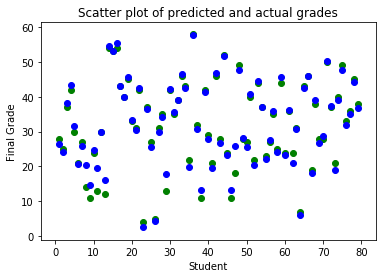

In [42]:

plt.scatter(x_vals, test_y, color='green')
plt.scatter(x_vals,pred_y, color='blue')
plt.xlabel('Student')
plt.ylabel('Final Grade')
plt.title('Scatter plot of predicted and actual grades')
plt.show()

In [43]:
gb_famrel = df.groupby('famrel')

In [44]:
famrel_dict = {}
for name, group in gb_famrel:
    famrel_dict[name] = int(np.mean(group['final_grade']))
famrel_dict
    

{1: 32, 2: 32, 3: 31, 4: 31, 5: 32}

In [45]:
gb_activities = df.groupby('activities')
activities_dict = {}
for name, group in gb_activities:
    activities_dict[name] = int(np.mean(group['final_grade']))
activities_dict

{0: 31, 1: 32}

In [46]:
gb_age = df.groupby('age')
age_dict = {}
for name, group in gb_age:
    age_dict[name] = int(np.mean(group['final_grade']))
age_dict

{15: 33, 16: 33, 17: 31, 18: 30, 19: 27, 20: 41, 21: 25, 22: 22}

In [47]:
gb_absences = df.groupby('absences')
absences_dict = {}
for name, group in gb_absences:
    absences_dict[name] = int(np.mean(group['final_grade']))
absences_dict

{0: 28,
 1: 38,
 2: 35,
 3: 34,
 4: 33,
 5: 33,
 6: 34,
 7: 34,
 8: 31,
 9: 39,
 10: 33,
 11: 35,
 12: 32,
 13: 36,
 14: 28,
 15: 24,
 16: 30,
 17: 30,
 18: 26,
 19: 30,
 20: 35,
 21: 53,
 22: 25,
 23: 39,
 24: 54,
 25: 28,
 26: 19,
 28: 28,
 30: 24,
 38: 25,
 40: 35,
 54: 34,
 56: 26,
 75: 28}

In [48]:
df['absences'].value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
7       7
16      7
18      5
5       5
20      4
22      3
13      3
1       3
9       3
11      3
15      3
23      1
24      1
21      1
25      1
56      1
26      1
28      1
30      1
17      1
38      1
40      1
54      1
19      1
75      1
Name: absences, dtype: int64

In [49]:
df_orig = pd.read_csv('student-math.csv', delimiter=';')
df_orig['final_grade'] = df_orig['G1'] + df_orig['G2'] + df_orig['G3']
df_orig.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,44
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,26
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,45
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,35
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,17
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,53
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,44


In [50]:
teacher_parents = df_orig[(df_orig['Fjob'] == 'teacher') | (df_orig['Mjob'] == 'teacher')]

In [51]:
father_teacher = df_orig[(df_orig['Fjob'] == 'teacher') & (df_orig['Mjob'] != 'teacher')]

In [52]:
mother_teacher = df_orig[(df_orig['Mjob'] == 'teacher') & (df_orig['Fjob'] != 'teacher')]

In [53]:
both_teachers = df_orig[(df_orig['Mjob'] == 'teacher') & (df_orig['Fjob'] == 'teacher')]

In [54]:
none_teacher = df_orig[(df_orig['Mjob'] != 'teacher') & (df_orig['Fjob'] != 'teacher')]

In [55]:
father_teacher_mean = int(np.mean(father_teacher['final_grade']))
mother_teacher_mean = int(np.mean(mother_teacher['final_grade']))
both_teacher_mean = int(np.mean(both_teachers['final_grade']))
none_teacher_mean = int(np.mean(none_teacher['final_grade']))

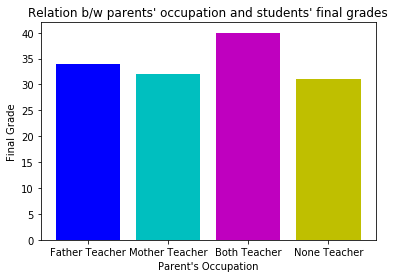

In [56]:
labels = ['Father Teacher', 'Mother Teacher', 'Both Teacher', 'None Teacher']
values = [father_teacher_mean, mother_teacher_mean, both_teacher_mean, none_teacher_mean]

plt.bar(labels, values, color=['b', 'c', 'm', 'y'])
plt.xlabel("Parent's Occupation")
plt.ylabel('Final Grade')
plt.title("Relation b/w parents' occupation and students' final grades")
plt.show()

In [57]:
for i in range(len(values)):
    print(labels[i] + 'mean :' + str(values[i]))

Father Teachermean :34
Mother Teachermean :32
Both Teachermean :40
None Teachermean :31


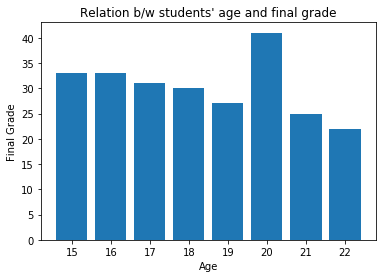

In [58]:
age_x = list(age_dict.keys())
age_y = list(age_dict.values())
plt.bar(age_x, age_y)
plt.xlabel('Age')
plt.ylabel('Final Grade')
plt.title("Relation b/w students' age and final grade")
plt.show()